<a href="https://colab.research.google.com/github/DanaJian/-/blob/main/Logistic_Regression_in_Neural_Networks_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from scipy import ndimage
import os     
import urllib.request as url 

%matplotlib inline


def load_dataset():
    url.urlretrieve('https://github.com/andrew-veriga/Neural-Networks-and-Deep-Learning/raw/master/datasets/train_catvnoncat.h5', 'train_catvnoncat.h5')
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    url.urlretrieve('https://github.com/andrew-veriga/Neural-Networks-and-Deep-Learning/raw/master/datasets/test_catvnoncat.h5', 'test_catvnoncat.h5')
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [2]:
# Загрузка данных (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


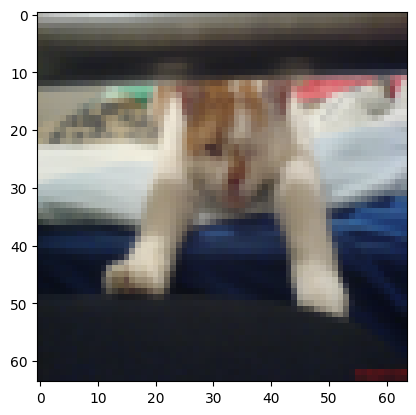

In [5]:
# Пример изображения
index = 29
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [74]:
# Нахождение значений m_train (количество обучающих примеров), m_test (количество тестовых примеров) и num_px (высота/ширина обучающего изображения)
m_train = train_set_x_orig.shape[0] 
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [7]:
# Измениние формы обучающих и тестовых наборов данных так, чтобы изображения размера (num_px, num_px, 3) вытянулись в отдельные векторы размерности (num _px*num _px*3, 1).
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))


train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [8]:
# Стандартизация наборов данных.
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [75]:
# Реализация функции sigmoid().
def sigmoid(z):

    s = 1 / (1 + np.exp(-z))

    return s

In [10]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [21]:
# Инициализация 𝑤 как вектор из нулей.
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [22]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))


w = [[0.]
 [0.]]
b = 0


In [23]:
# Реализация функции propagate().
def propagate(w, b, X, Y):
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [25]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [40]:
# Реализация функции optimize().
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []

    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print("Затраты после итерации %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [41]:
params_, grads_, costs_ = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params_["w"]))
print ("b = " + str(params_["b"]))
print ("dw = " + str(grads_["dw"]))
print ("db = " + str(grads_["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [42]:
# Реализация функции predict().
def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [43]:
w_ = np.array([[0.1124579],[0.23106775]])
b_ = -0.3
X_ = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("прогнозы = " + str(predict(w_, b_, X_)))

прогнозы = [[1. 1. 0.]]


In [46]:
# Реализация модели.
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=print_cost)

    w = parameters["w"]
    b = parameters["b"]
 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [47]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Затраты после итерации 0: 0.693147
Затраты после итерации 100: 0.584508
Затраты после итерации 200: 0.466949
Затраты после итерации 300: 0.376007
Затраты после итерации 400: 0.331463
Затраты после итерации 500: 0.303273
Затраты после итерации 600: 0.279880
Затраты после итерации 700: 0.260042
Затраты после итерации 800: 0.242941
Затраты после итерации 900: 0.228004
Затраты после итерации 1000: 0.214820
Затраты после итерации 1100: 0.203078
Затраты после итерации 1200: 0.192544
Затраты после итерации 1300: 0.183033
Затраты после итерации 1400: 0.174399
Затраты после итерации 1500: 0.166521
Затраты после итерации 1600: 0.159305
Затраты после итерации 1700: 0.152667
Затраты после итерации 1800: 0.146542
Затраты после итерации 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [48]:
classes[int(d["Y_prediction_test"][0,index])]

b'cat'

y = 1, you predicted that it is a "cat" picture.


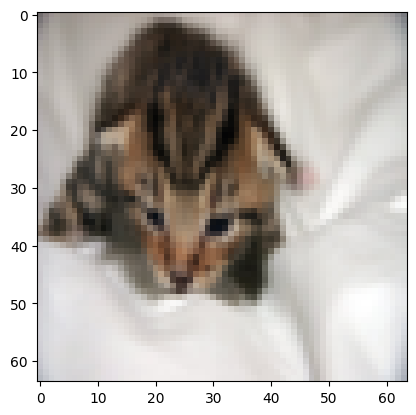

In [50]:
# Пример изображения, которая классифицируется неверно.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(test_set_y[0,index])].decode("utf-8") +  "\" picture.")

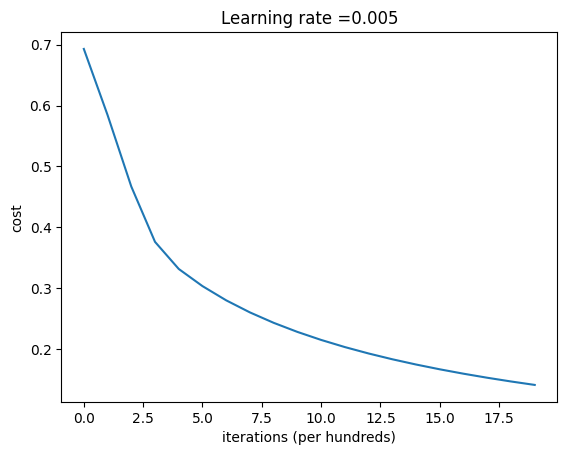

In [51]:
# Кривая процесса обучения (изменение затрат по мере итерации).
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



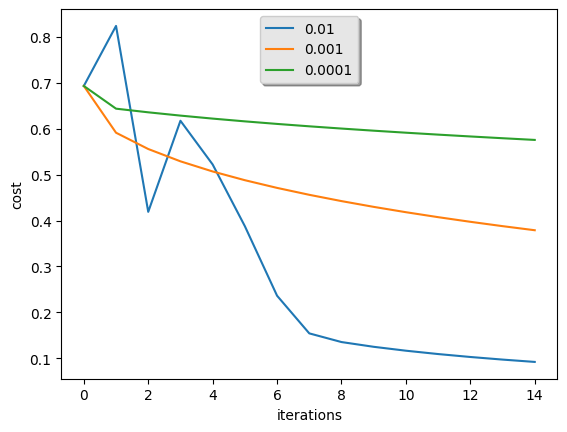

In [52]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()


y = 1.0, your algorithm predicts a "cat" picture.


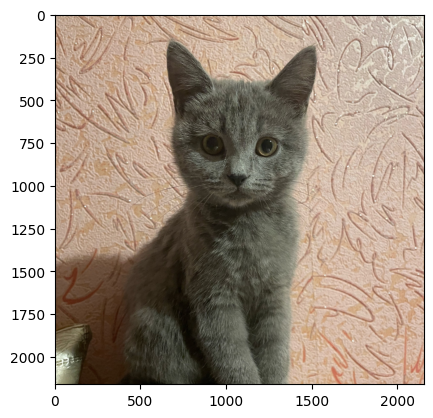

In [81]:
# Проверка эффективности модели с собственным изображением (мою кошку зовут Чмоня).
import imageio
from skimage.transform import resize

my_image = "chmonya.jpeg"

fname = my_image
image = Image.open(my_image).convert('RGB')
resized_image = np.squeeze(np.asarray(image.resize((num_px, num_px)))).reshape((1, num_px * num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], resized_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")